----

# Uczenie Maszynowe Część 2

#### Wprowadzenie do uczenia nadzorowanego. Problem przewidywania wartości. Regresja liniowa.

----

```






```

----

## Zadania

----

```


```

----

**Zadanie 1**

> Zbiór Danych:

```
Zbiór danych dotyczy cen nieruchomości w Bostonie. Celem jest przewidywanie ceny
(kolumna MEDV) nieruchomości w zależności od innych cech. Zbiór danych dotyczy 506
nieruchomości opisanych za pomocą 13 cech + cena:

CRIM - współczynnik przestępczości w mieście,
ZN - odsetek "dużych działek" - powyżej 2500 m2,
INDUS - odsetek terenów industrialnych w mieście,
CHAS - jeśli teren znajduje się przy rzece Charles -1, w pozostałych przypadkach 0,
NOX - stężenie tlenków azotu,
RM - średnia ilość pomieszczeń w budynku,
AGE - odsetek "starych budynków" - powstałych przed 1940 r.,
DIS - ważona odległość od urzędów pracy w Bostonie,
RAD - wskaźnik dostępności do głównych dróg,
TAX - wartość podatku od nieruchomości liczona od 10 tys. dolarów,
PTRATIO - stosunek liczby uczniów na nauczycieli w mieście,
B - odsetek osób pochodzenia afroamerykańskiego,
LSTAT - odsetek mieszkańców zaliczany do ubogich (odsetek ubóstwa),
MEDV - mediana wartości domów z danego terenu (w tys. dolarów).
```

> 1.1. Import modułów

In [1]:
#pip install scikit-learn pandas matplotlib seaborn numpy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics

> 1.2. Wczytanie Danych.

In [3]:
df = pd.read_csv('housing.csv', names=['CRIM',  'ZN',  'INDUS',  'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], sep=r'\s+') 

#Wywołanie obiektu df
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


> 1.3. Sprawdzenie podstawowych statystyk.

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


> 1.4. Sprawdzenie kompletności danych.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


> 1.5. Czy typy danych są akceptowalne?

* Dane są akceptowalne, ponieważ reprezentują dane numeryczne (brak null i danych jakościowych -- tylko int i float)

> 1.6. Wykresy pudełkowe dla wszystkich kolumn.

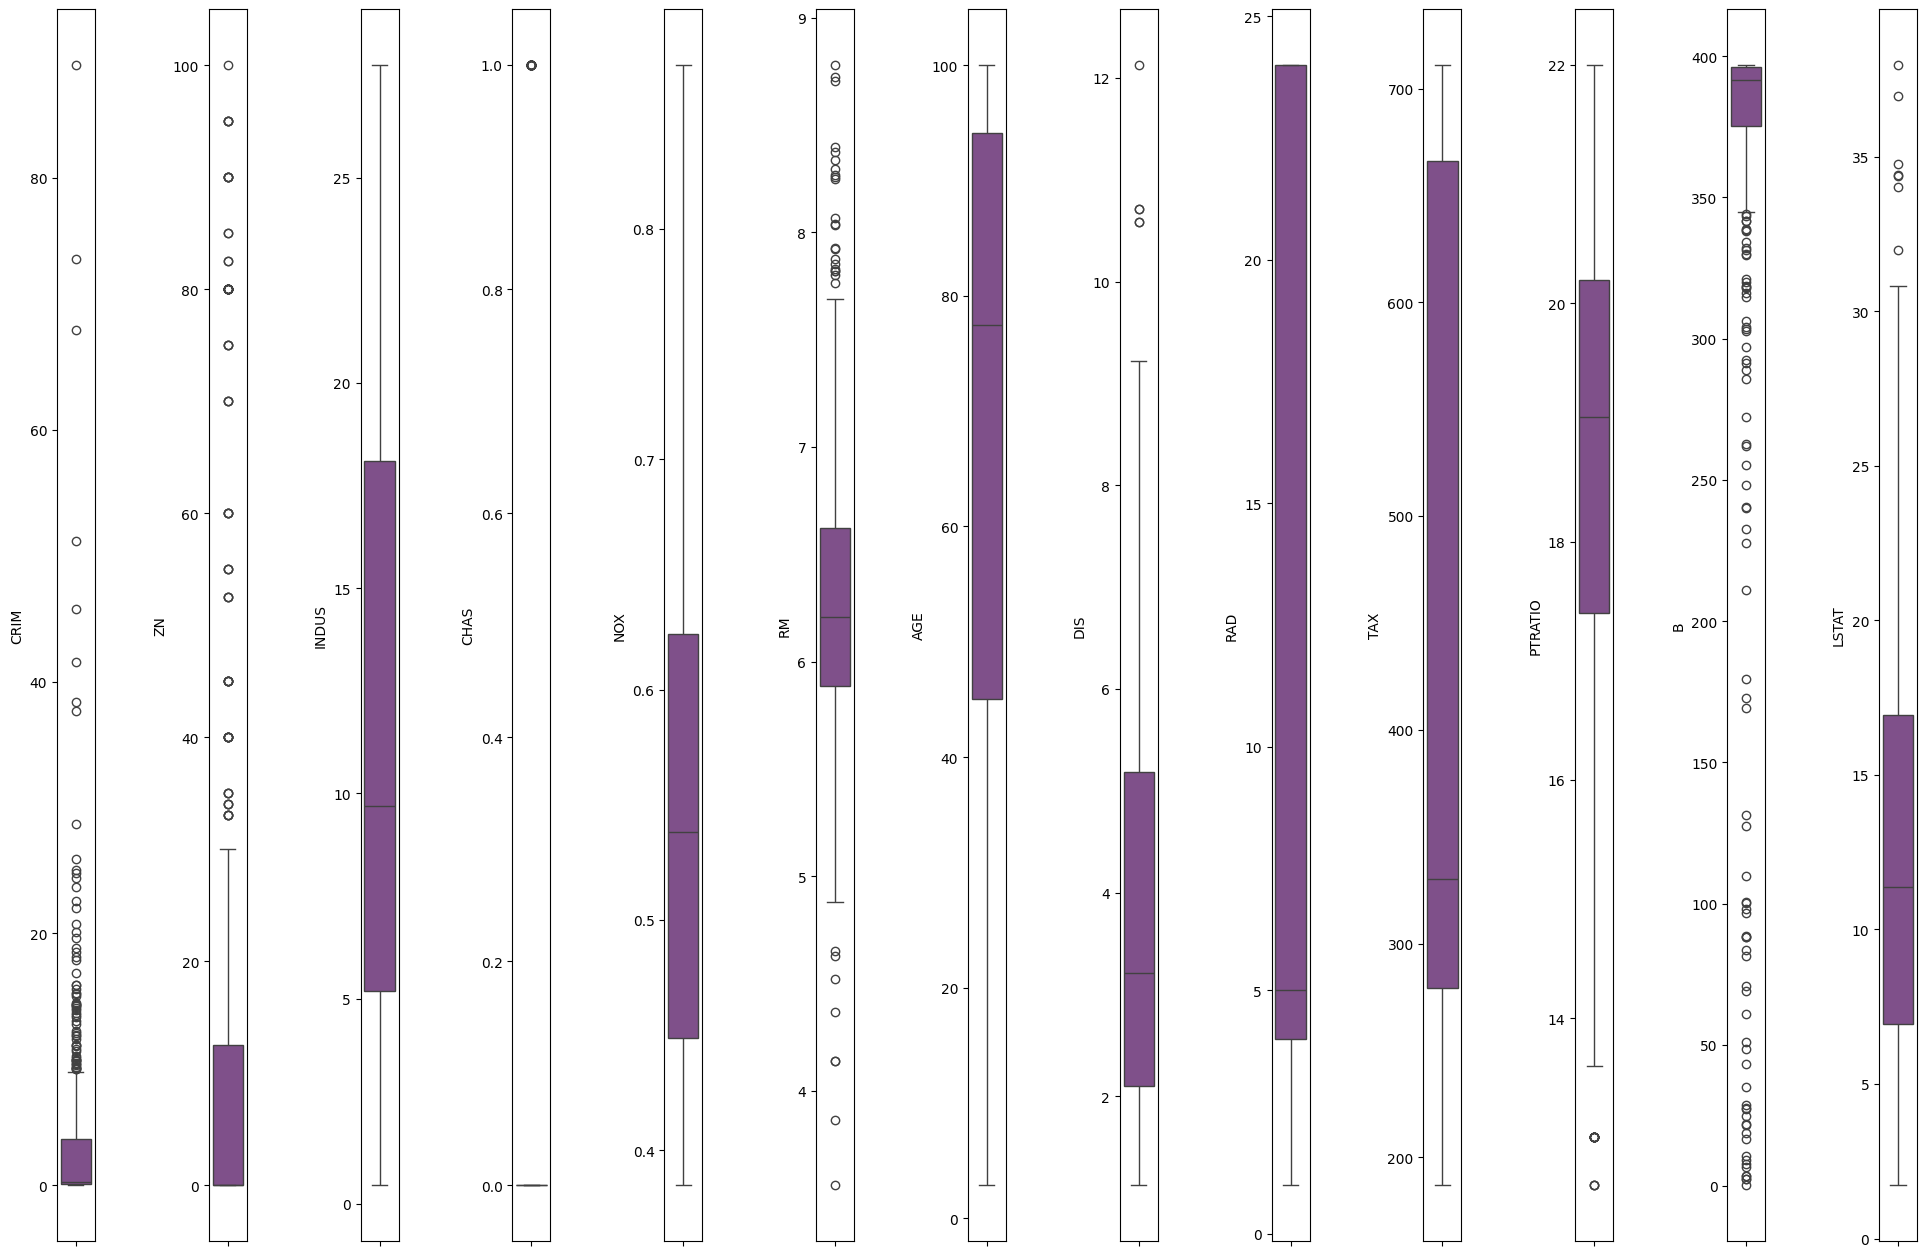

In [36]:
fig, ax = plt.subplots(ncols = 13, figsize=(24,16))
plt.subplots_adjust(wspace = 3)
sns.set_palette("PRGn")
for i in range(0,13):
    s = sns.boxplot(ax = ax[i], data = df[df.columns[i]])
    #s = sns.boxplot(ax = ax[i], data = df[df.columns[i]], showfliers = False)
plt.show()

> 1.7. Metoda IQR, czyli rozstępu międzykwartylowego, wyznaczenie %
wartości odstających dla każdej z kolumn. Dana wartość jest traktowana jako odstająca, gdy
xi < Q1 - 1.5 · IQR (wartość za mała) lub xi > Q3 +1.5 · IQR (wartość za duża).

In [7]:
q1 = df.quantile(q=0.25)
q3 = df.quantile(q=0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("% wartości odstających dla każdej z kolumn:")
for i in df.columns:
    # Zliczanie wartości odstających poniżej i powyżej granic
    below_lim = df.loc[df[i] < lower_bound[i]].count()[i]
    above_lim = df.loc[df[i] > upper_bound[i]].count()[i]
    
    # Obliczenie procentu wartości odstających
    outliers_percentage = (below_lim + above_lim) * 100 / len(df[i])
    
    print(f"{i}\t{round(outliers_percentage, 3)}%")


% wartości odstających dla każdej z kolumn:
CRIM	13.043%
ZN	13.439%
INDUS	0.0%
CHAS	6.917%
NOX	0.0%
RM	5.929%
AGE	0.0%
DIS	0.988%
RAD	0.0%
TAX	0.0%
PTRATIO	2.964%
B	15.217%
LSTAT	1.383%
MEDV	7.905%


> 1.8. Macierz korelacji dla wszystkich cech.

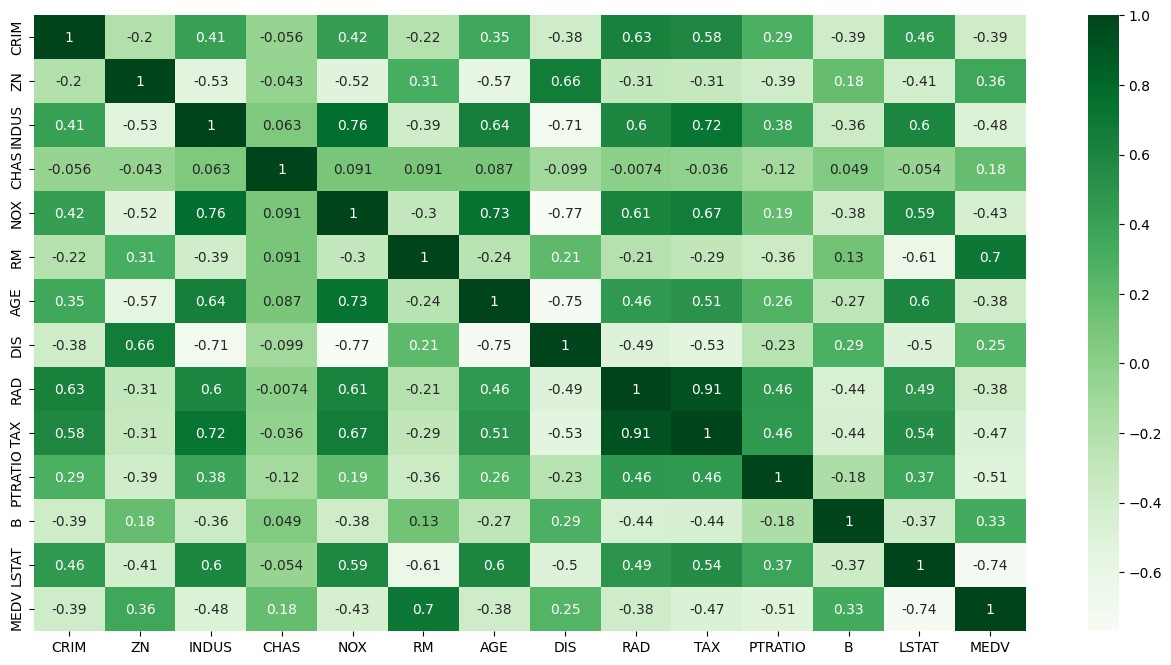

In [8]:
corr = df.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

> 1.9. Wykres pairplot dla wszystkich kolumn.

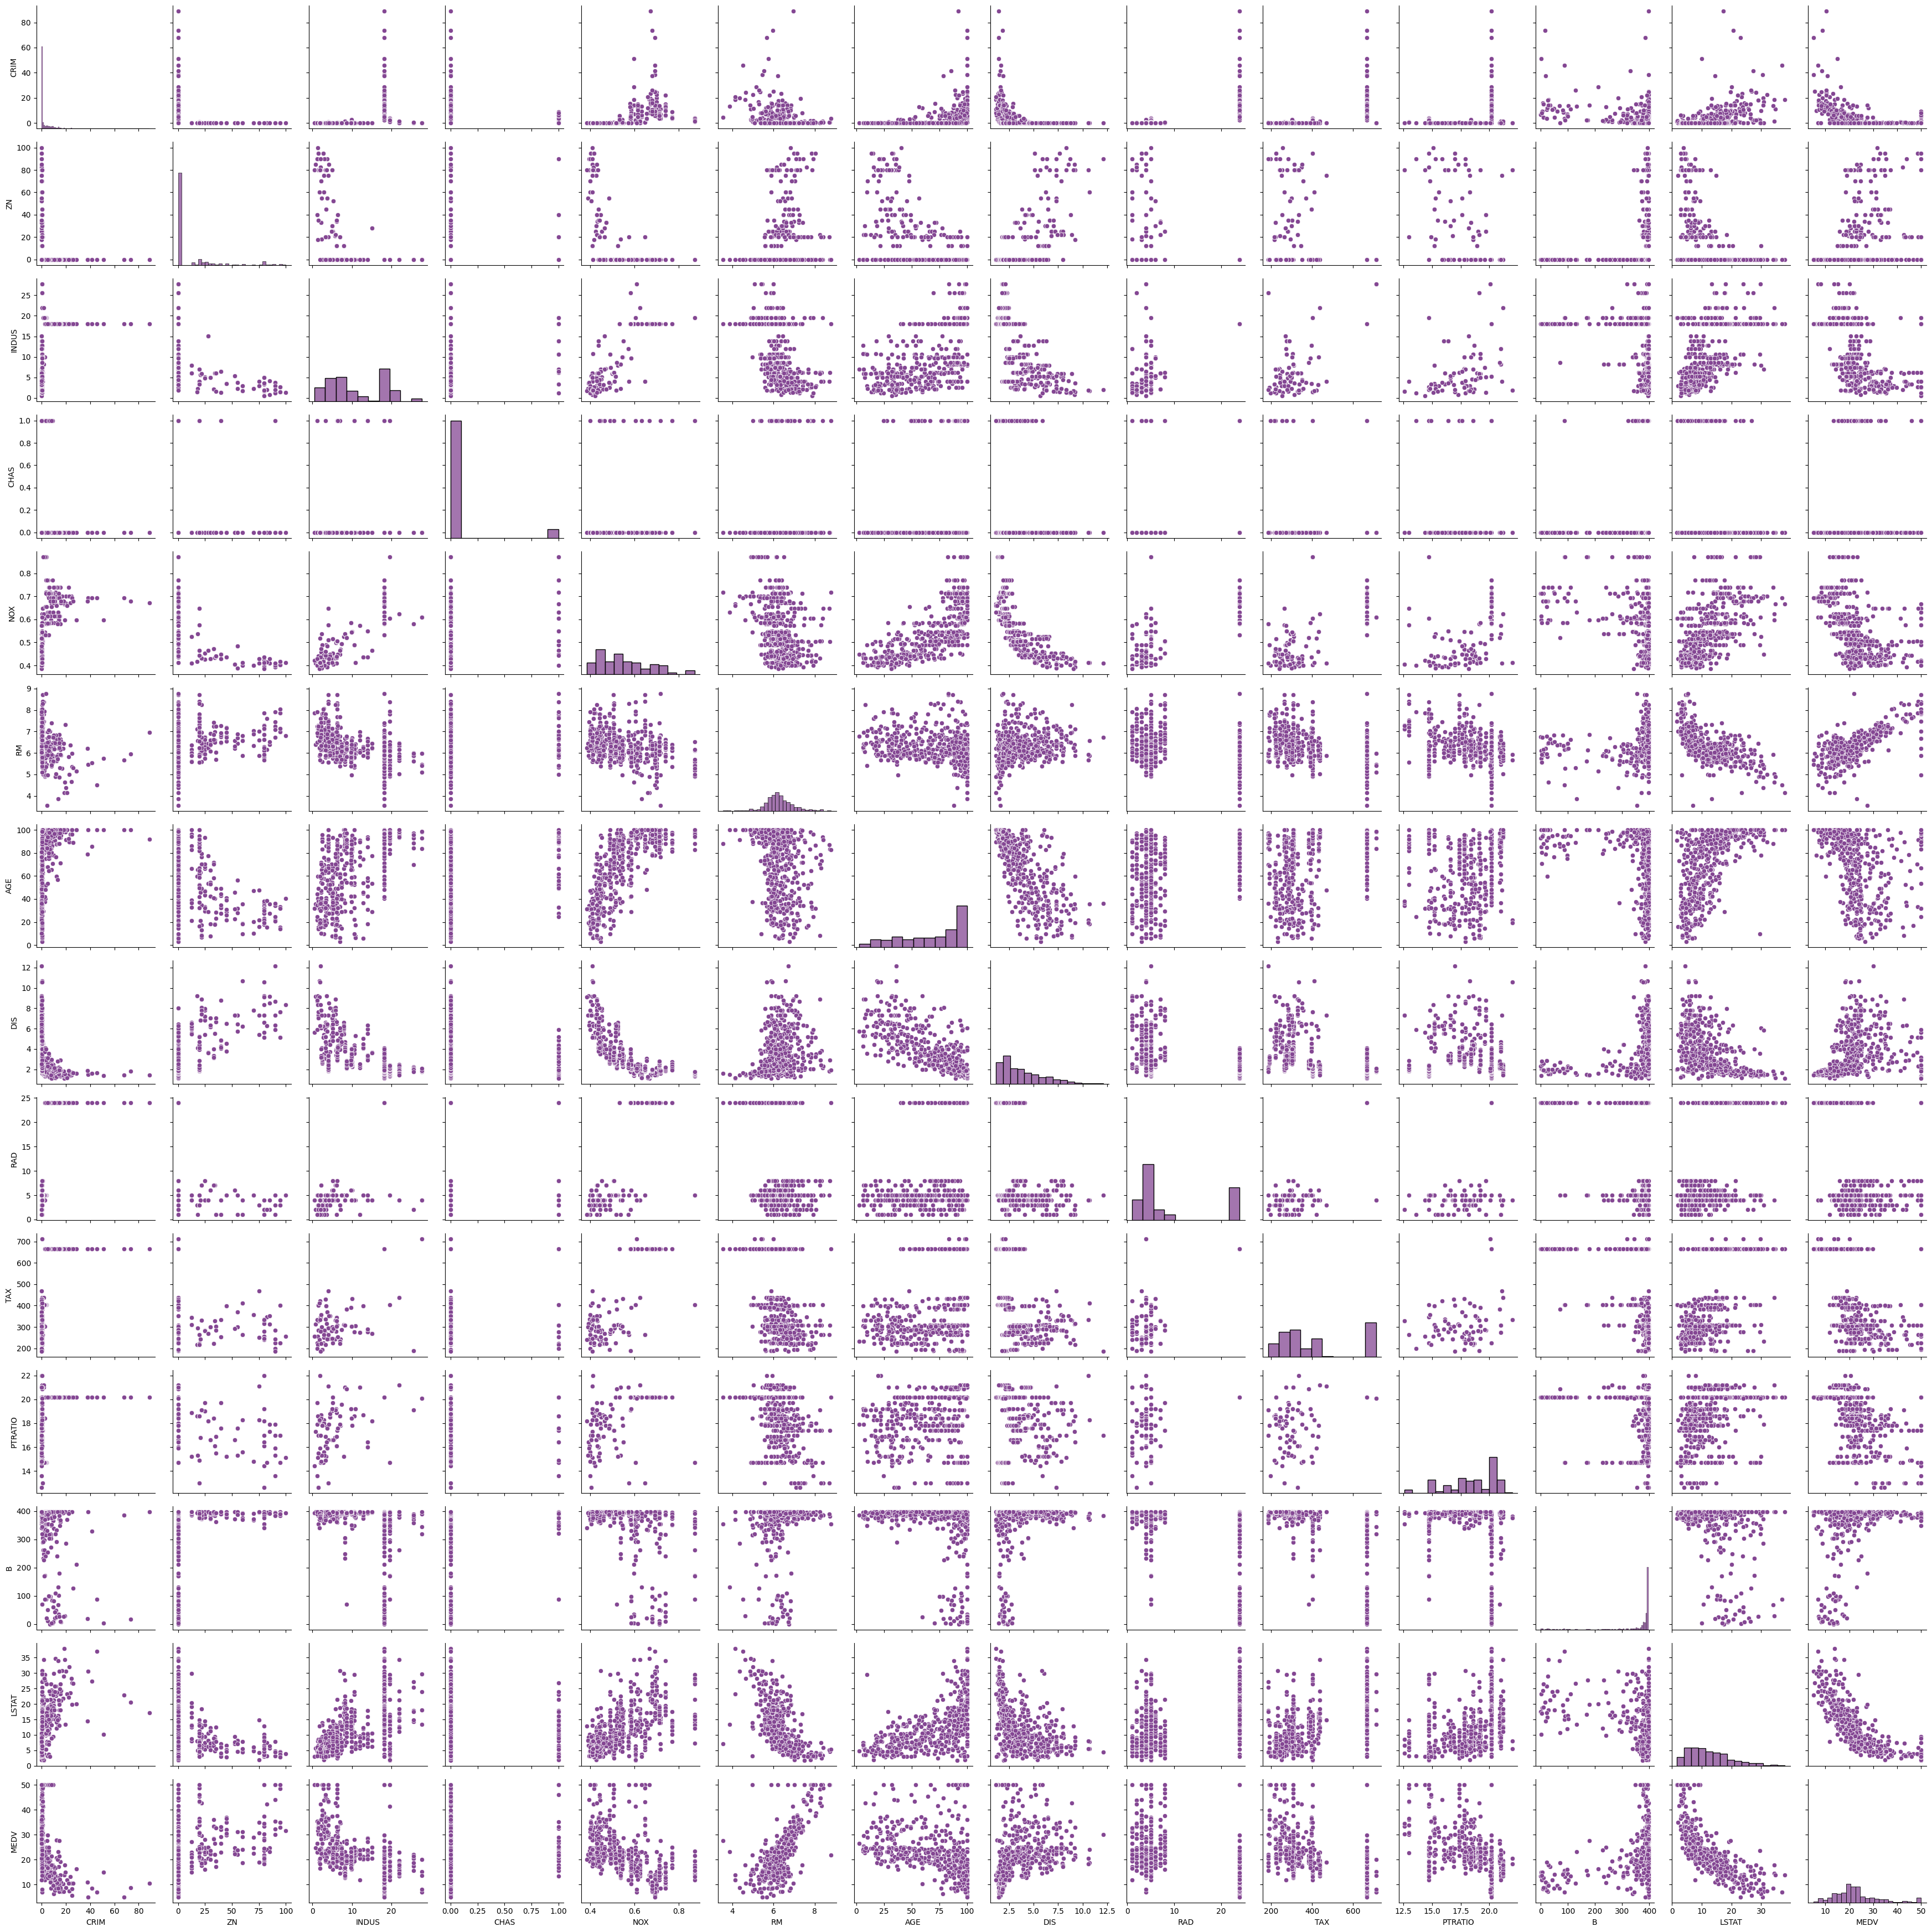

In [9]:
sns.pairplot(df)
plt.tight_layout()
plt.show()

> 1.10. Utowrzenie obiektu, który będzie zawierać najbardziej skorelowane cechy
o współczynniku korelacji <-0.5 oraz >0.5.

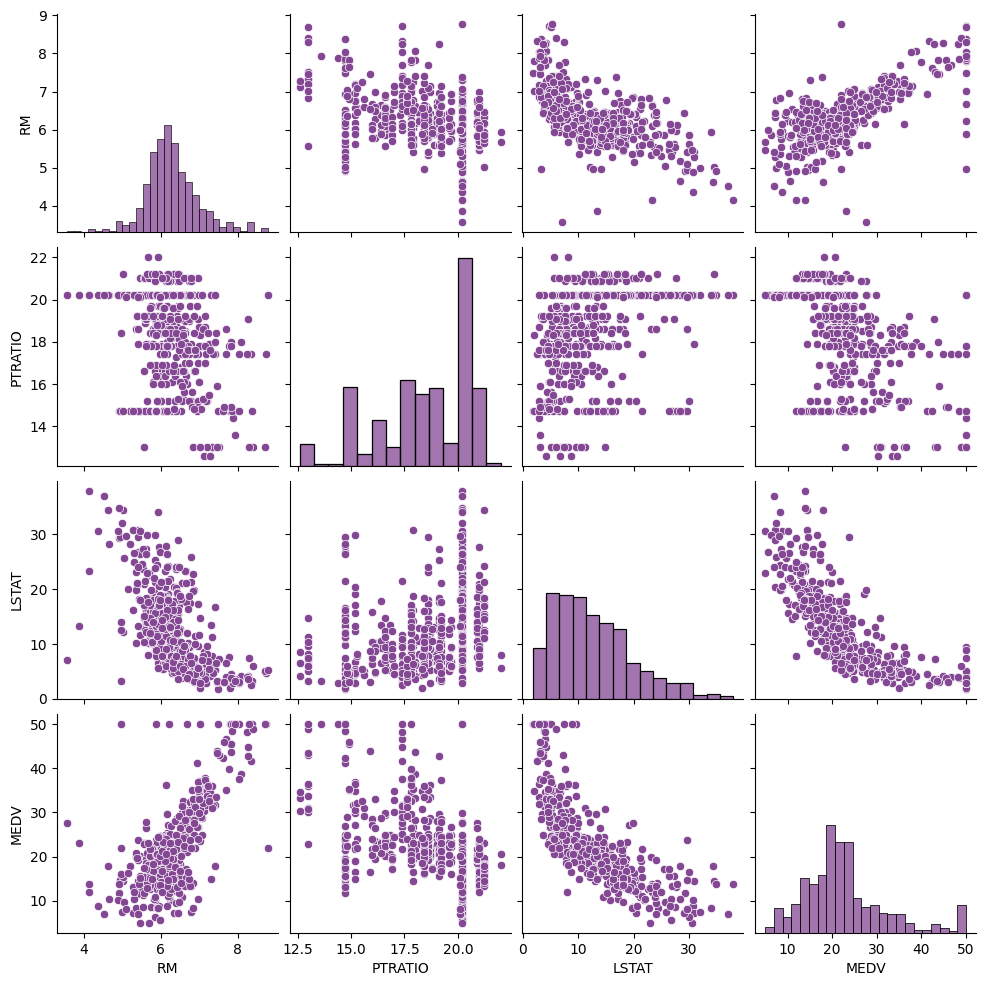

In [10]:
# Wybór najbardziej skorelowanych cech o współczynniku korelacji <-0.5 lub >0.5
high_corr_features = corr[(corr < -0.5) | (corr > 0.5)]['MEDV'].dropna()

# Wybór odpowiednich kolumn z oryginalnych danych
df_selected = df[high_corr_features.index]

# Rysowanie funkcji pairplot dla wybranych cech
sns.pairplot(df_selected)
plt.show()

> 1.11. Zmienna X wszystkie kolumny (13) z zestawu danych (macierz cech).

In [11]:
X = df.drop(labels='MEDV', axis=1)

#Wyswietlenie X:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


> 1.12. Zmienna y dane z kolumny MEDV.

In [12]:
y = df['MEDV']

#Wyswietlenie y:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

> 1.13. Dane powstałe z podziału X i y na dane uczące i testowe.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

> 1.14. Obiekt regresji liniowej model.

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

> 1.15. Wartości współczynników dopasowania.

In [15]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Współczynniki dopasowania:\n", coefficients)

Współczynniki dopasowania:
          Coefficient
CRIM       -0.098991
ZN          0.042505
INDUS       0.016739
CHAS        3.064379
NOX       -15.646253
RM          4.018884
AGE        -0.000832
DIS        -1.446280
RAD         0.267827
TAX        -0.010473
PTRATIO    -0.888652
B           0.008253
LSTAT      -0.549367


> 1.16. Wynik predykcji dla X_test.

In [16]:
y_pred = model.predict(X_test)

#Wyświetlenie y_pred
y_pred

array([40.38909533, 27.88818526, 16.33126585, 17.34675932, 30.91273758,
       32.82478967, 39.95560959,  8.4519632 , 33.28696607,  7.26751237,
       29.77875241, 13.70647921, 16.10840816, 16.65150567, 25.03371365,
       19.89032014,  6.79501283, 32.9949698 , 28.45233055, 24.72790211,
       12.81760374, 20.2792643 , 22.37316895, 24.95238223, 34.01786165,
       19.10866644, 31.80654265, 19.09506858, 26.40103588, 34.13083397,
       19.66337036, 18.24445944, 36.99113563, 44.48687324, 30.72146569,
       22.31475986, 16.17389267, 17.91169858,  4.80466972, 30.60025057,
       23.92860043, 16.46250167, 35.26168512, 13.85353888, 17.81678796,
       25.33703575, 30.79303765, 16.47025922, 26.65460208, 23.15784888,
       32.62443559, 38.6798773 , 22.21243126, 15.78598365, 30.5359631 ,
       -0.25281891, 20.07283762, 16.83546069, 22.54691328, 20.67388019,
       30.46894504,  3.38104287, 13.94720253, 19.46240302, 10.03614762,
       24.67738776, 24.20357095, 19.43161581, 18.3602221 , 19.03

> 1.17. Wykres punktowy y_test vs y_pred.

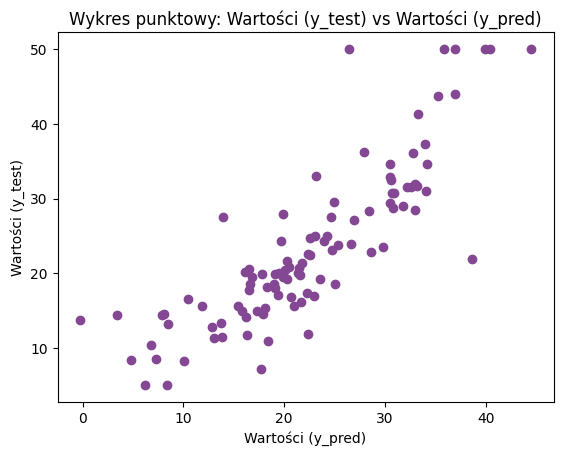

In [17]:
plt.scatter(y_pred, y_test)
plt.ylabel("Wartości (y_test)", horizontalalignment='center')
plt.xlabel("Wartości (y_pred)", horizontalalignment='center')
plt.title("Wykres punktowy: Wartości (y_test) vs Wartości (y_pred)")
plt.show()

> 1.18. Ewaluacja modelu, wartość MAE, MSE, RMSE, R2.

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# Obliczenie wartości metryk
mae = round(mean_absolute_error(y_test, y_pred), 2)
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
r2 = round(r2_score(y_test, y_pred), 4)

# Stworzenie DataFrame z wynikami
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Value': [mae, mse, rmse, r2]
})

# Wyświetlenie DataFrame
print(metrics_df)


  Metric    Value
0    MAE   4.0000
1    MSE  33.2700
2   RMSE   5.7700
3     R2   0.7035


> 1.19. Regularyzacja.

In [19]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

> * 1.19.1. Regresja grzbietowa.

In [20]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

# Obliczenie wartości metryk
mae = round(mean_absolute_error(y_test, y_pred), 2)
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
r2 = round(r2_score(y_test, y_pred), 4)

# Stworzenie DataFrame z wynikami
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Value': [mae, mse, rmse, r2]
})

# Wyświetlenie DataFrame
print(metrics_df)

  Metric    Value
0    MAE   4.0100
1    MSE  33.6000
2   RMSE   5.8000
3     R2   0.7005


> * 1.19.2. Regresja metodą lasso.

In [21]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

# Obliczenie wartości metryk
mae = round(mean_absolute_error(y_test, y_pred), 2)
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
r2 = round(r2_score(y_test, y_pred), 4)

# Stworzenie DataFrame z wynikami
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Value': [mae, mse, rmse, r2]
})

# Wyświetlenie DataFrame
print(metrics_df)

  Metric    Value
0    MAE   4.1400
1    MSE  35.3600
2   RMSE   5.9500
3     R2   0.6848


> * 1.19.3. Regresja elastycznej siatki.

In [22]:
elastic = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic.fit(X_train, y_train)
y_pred = elastic.predict(X_test)

# Obliczenie wartości metryk
mae = round(mean_absolute_error(y_test, y_pred), 2)
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
r2 = round(r2_score(y_test, y_pred), 4)

# Stworzenie DataFrame z wynikami
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Value': [mae, mse, rmse, r2]
})

# Wyświetlenie DataFrame
print(metrics_df)

  Metric    Value
0    MAE   4.1800
1    MSE  36.0400
2   RMSE   6.0000
3     R2   0.6788


> 1.20. Przypisanie do zmiennej kolumny 'RM', 'PTRATIO', 'LSTAT', a do zmiennej y z kolumny MEDV.

Współczynniki dopasowania:
          Coefficient
RM          4.693523
PTRATIO    -0.869067
LSTAT      -0.565558


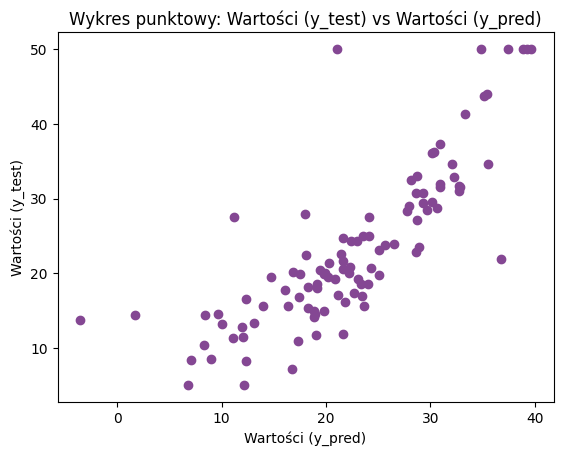


Regresja:    Metric    Value
0    MAE   4.2900
1    MSE  39.5200
2   RMSE   6.2900
3     R2   0.6477

Ridge    Metric    Value
0    MAE   4.2900
1    MSE  39.5200
2   RMSE   6.2900
3     R2   0.6478

Lasso    Metric    Value
0    MAE   4.3700
1    MSE  40.0300
2   RMSE   6.3300
3     R2   0.6432

Elastic    Metric   Value
0    MAE   4.440
1    MSE  41.060
2   RMSE   6.410
3     R2   0.634


In [23]:
X_selected = df[['RM','PTRATIO','LSTAT']]
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.2, random_state = 101)
model = LinearRegression()
model.fit(X_train, y_train)

coefficients = pd.DataFrame(model.coef_, X_selected.columns, columns=['Coefficient'])
print("Współczynniki dopasowania:\n", coefficients)

y_pred = model.predict(X_test)

plt.scatter(y_pred, y_test)
plt.ylabel("Wartości (y_test)", horizontalalignment='center')
plt.xlabel("Wartości (y_pred)", horizontalalignment='center')
plt.title("Wykres punktowy: Wartości (y_test) vs Wartości (y_pred)")
plt.show()

# Obliczenie wartości metryk
mae = round(mean_absolute_error(y_test, y_pred), 2)
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
r2 = round(r2_score(y_test, y_pred), 4)

# Stworzenie DataFrame z wynikami
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Value': [mae, mse, rmse, r2]
})

# Wyświetlenie DataFrame
print("\nRegresja: ", metrics_df)



ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

# Obliczenie wartości metryk
mae = round(mean_absolute_error(y_test, y_pred), 2)
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
r2 = round(r2_score(y_test, y_pred), 4)

# Stworzenie DataFrame z wynikami
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Value': [mae, mse, rmse, r2]
})

# Wyświetlenie DataFrame
print("\nRidge ", metrics_df)


lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

# Obliczenie wartości metryk
mae = round(mean_absolute_error(y_test, y_pred), 2)
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
r2 = round(r2_score(y_test, y_pred), 4)

# Stworzenie DataFrame z wynikami
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Value': [mae, mse, rmse, r2]
})

# Wyświetlenie DataFrame
print("\nLasso ", metrics_df)


elastic = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic.fit(X_train, y_train)
y_pred = elastic.predict(X_test)

# Obliczenie wartości metryk
mae = round(mean_absolute_error(y_test, y_pred), 2)
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
r2 = round(r2_score(y_test, y_pred), 4)

# Stworzenie DataFrame z wynikami
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Value': [mae, mse, rmse, r2]
})

# Wyświetlenie DataFrame
print("\nElastic ", metrics_df)

----

```



```

----

**Zadanie 2**

> 2.1. Proces standaryzacji.

In [24]:
from sklearn.preprocessing import StandardScaler

X = df.drop(labels='MEDV', axis=1)
y = df['MEDV']

> 2.2. Obiekt scaler, który będzie służył do standaryzacji danych:

In [25]:
scaler = StandardScaler()

> 2.3. Metoda fit, która dopasuje model do danych treningowych.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
scaler.fit(X_train)

StandardScaler()

> 2.4. Treningowy zestaw cech przekształcony przy użyciu metody transform():

In [27]:
scaled_X_train = scaler.transform(X_train)

> 2.5. Testowy zestaw cech (X_test) za pomocą transform:

In [28]:
scaled_X_test = scaler.transform(X_test)

> 2.6. Stworzenie i trenowanie modelu:

In [29]:
std_model = LinearRegression()
std_model.fit(scaled_X_train, y_train)

LinearRegression()

> 2.7. Wyświetlenie wartości współczynników dopasowania.

In [30]:
coefficients = pd.DataFrame(std_model.coef_, X.columns, columns=['Coefficient'])
print("Współczynniki dopasowania:\n", coefficients)

Współczynniki dopasowania:
          Coefficient
CRIM       -0.791225
ZN          0.952976
INDUS       0.114842
CHAS        0.765268
NOX        -1.773915
RM          2.703861
AGE        -0.023473
DIS        -3.011843
RAD         2.318035
TAX        -1.769274
PTRATIO    -1.907946
B           0.756906
LSTAT      -3.755397


> 2.8. Wynik predykcji dla scaled_X_test.

In [31]:
y_pred = std_model.predict(scaled_X_test)

> 2.9. Wykres punktowy scaled_X_test vs y_test z naniesioną krzywą regresji.

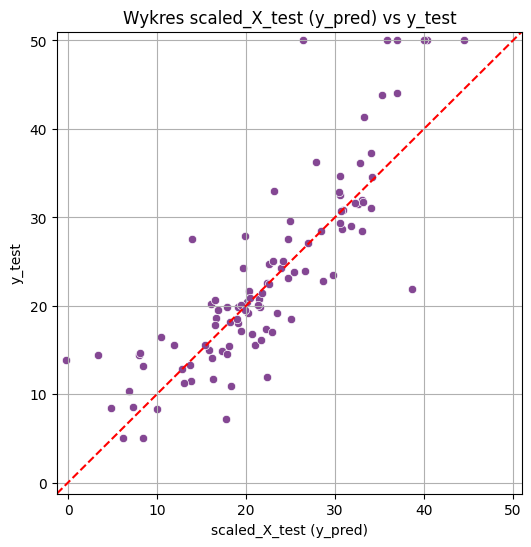

In [32]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_pred, y=y_test)

plt.title("Wykres scaled_X_test (y_pred) vs y_test")
plt.xlabel('scaled_X_test (y_pred)')
plt.ylabel('y_test')

lower_limit = min(np.min(y_pred), np.min(y_test)) - 1
upper_limit = max(np.max(y_pred), np.max(y_test)) + 1

plt.xlim(lower_limit, upper_limit)
plt.ylim(lower_limit, upper_limit)

plt.plot([lower_limit, upper_limit], [lower_limit, upper_limit], color='red', linestyle='--')

plt.grid(True)
plt.draw()
plt.show()

> 2.10. Ewaluacja modelu.

In [33]:
# Obliczenie wartości metryk
mae = round(mean_absolute_error(y_test, y_pred), 2)
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
r2 = round(r2_score(y_test, y_pred), 4)

# Stworzenie DataFrame z wynikami
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Value': [mae, mse, rmse, r2]
})

# Wyświetlenie DataFrame
print(metrics_df)

  Metric    Value
0    MAE   4.0000
1    MSE  33.2700
2   RMSE   5.7700
3     R2   0.7035


> 2.11. Regularyzacja.

In [34]:
ridge = Ridge(alpha=0.5)
ridge.fit(scaled_X_train, y_train)
y_pred = ridge.predict(scaled_X_test)

# Obliczenie wartości metryk
mae = round(mean_absolute_error(y_test, y_pred), 2)
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
r2 = round(r2_score(y_test, y_pred), 4)

# Stworzenie DataFrame z wynikami
ridge_metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Value': [mae, mse, rmse, r2]
})

# Wyświetlenie DataFrame
print("\nRegresja grzbietowa:", ridge_metrics_df)


lasso = Lasso(alpha=0.5)
lasso.fit(scaled_X_train, y_train)
y_pred = lasso.predict(scaled_X_test)

# Obliczenie wartości metryk
mae = round(mean_absolute_error(y_test, y_pred), 2)
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
r2 = round(r2_score(y_test, y_pred), 4)

# Stworzenie DataFrame z wynikami
lasso_metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Value': [mae, mse, rmse, r2]
})

# Wyświetlenie DataFrame
print("\nLasso: ", lasso_metrics_df)


elastic = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic.fit(scaled_X_train, y_train)
y_pred = elastic.predict(scaled_X_test)

# Obliczenie wartości metryk
mae = round(mean_absolute_error(y_test, y_pred), 2)
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
r2 = round(r2_score(y_test, y_pred), 4)

# Stworzenie DataFrame z wynikami
elastic_metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Value': [mae, mse, rmse, r2]
})

# Wyświetlenie DataFrame
print("Elastic: ", elastic_metrics_df)


Regresja grzbietowa:   Metric    Value
0    MAE   4.0000
1    MSE  33.2800
2   RMSE   5.7700
3     R2   0.7033

Lasso:    Metric    Value
0    MAE   4.3400
1    MSE  39.0900
2   RMSE   6.2500
3     R2   0.6516
Elastic:    Metric    Value
0    MAE   4.1900
1    MSE  38.3100
2   RMSE   6.1900
3     R2   0.6585


> 2.12. Modele regresji liniowej, grzbietowej, lasso i elastycznej siatki dla
zeskalowanych wybranych cech: RM, PTRATIO, LSTAT.

In [35]:
X_selected = df[['RM','PTRATIO','LSTAT']]
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size = 0.2, random_state = 101)
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)
std_model = LinearRegression()
std_model.fit(scaled_X_train, y_train)
y_pred = std_model.predict(scaled_X_test)



# Obliczenie wartości metryk
mae = round(mean_absolute_error(y_test, y_pred), 2)
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
r2 = round(r2_score(y_test, y_pred), 4)

# Stworzenie DataFrame z wynikami
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Value': [mae, mse, rmse, r2]
})

# Wyświetlenie DataFrame
print("\nRegresja:\n", metrics_df)

ridge = Ridge(alpha=0.5)
ridge.fit(scaled_X_train, y_train)
y_pred = ridge.predict(scaled_X_test)

# Obliczenie wartości metryk
mae = round(mean_absolute_error(y_test, y_pred), 2)
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
r2 = round(r2_score(y_test, y_pred), 4)

# Stworzenie DataFrame z wynikami
ridge_metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Value': [mae, mse, rmse, r2]
})

# Wyświetlenie DataFrame
print("\nRegresja grzbietowa:\n", ridge_metrics_df)


lasso = Lasso(alpha=0.5)
lasso.fit(scaled_X_train, y_train)
y_pred = lasso.predict(scaled_X_test)

# Obliczenie wartości metryk
mae = round(mean_absolute_error(y_test, y_pred), 2)
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
r2 = round(r2_score(y_test, y_pred), 4)

# Stworzenie DataFrame z wynikami
lasso_metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Value': [mae, mse, rmse, r2]
})

# Wyświetlenie DataFrame
print("\nLasso:\n ", lasso_metrics_df)


elastic = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic.fit(scaled_X_train, y_train)
y_pred = elastic.predict(scaled_X_test)

# Obliczenie wartości metryk
mae = round(mean_absolute_error(y_test, y_pred), 2)
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
r2 = round(r2_score(y_test, y_pred), 4)

# Stworzenie DataFrame z wynikami
elastic_metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Value': [mae, mse, rmse, r2]
})

# Wyświetlenie DataFrame
print("Elastic:\n ", elastic_metrics_df)


Regresja:
   Metric    Value
0    MAE   4.2900
1    MSE  39.5200
2   RMSE   6.2900
3     R2   0.6477

Regresja grzbietowa:
   Metric    Value
0    MAE   4.2900
1    MSE  39.5200
2   RMSE   6.2900
3     R2   0.6477

Lasso:
    Metric    Value
0    MAE   4.3600
1    MSE  40.2600
2   RMSE   6.3500
3     R2   0.6411
Elastic:
    Metric    Value
0    MAE   4.4400
1    MSE  41.4300
2   RMSE   6.4400
3     R2   0.6307


----

```






```